In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create Some Data

In [4]:
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=100, n_features=3,centers=2,random_state=101)

In [6]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

## Scale the Data

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [9]:
# data[0] 
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [10]:
from mpl_toolkits.mplot3d import Axes3D

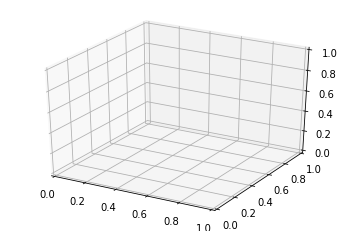

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

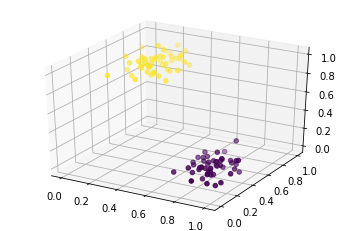

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

# The Linear Autoencoder

In [13]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [14]:
num_inputs = 3  # 3 dimensional input
num_hidden = 2  # 2 dimensional representation 
num_outputs = num_inputs # Must be true for an autoencoder!

learning_rate = 0.01

### Placeholder

Notice there is no real label here, just X.

In [15]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

### Layers

Using the fully_connected layers API, we **do not** provide an activation function!

In [16]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

Instructions for updating:
Please use `layer.__call__` method instead.


### Loss Function

In [17]:
loss = tf.reduce_mean(tf.square(outputs - X))  # MSE

### Optimizer

In [18]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train  = optimizer.minimize( loss)

### Init

In [19]:
init = tf.global_variables_initializer()

## Running the Session

In [20]:
num_steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X: scaled_data})

        
    # Now ask for the hidden layer output (the 2 dimensional output)
    output_2d = hidden.eval(feed_dict={X: scaled_data})

In [21]:
output_2d.shape

(100, 2)

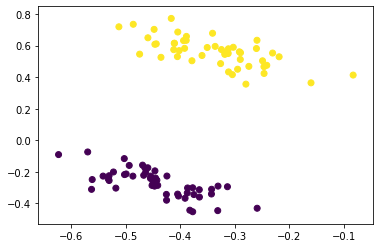

In [22]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=data[1])

# Great Job!